As a teaser, here is the plot we’re gonna try building:

<div style="max-width:95%">
<img src="https://www.economist.com/img/b/1000/591/90/sites/default/files/images/2021/08/articles/main/20210828_woc033.png">
</div> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke

In [2]:
BROWN = "#AD8C97"
BROWN_DARKER = "#7d3a46"
GREEN = "#2FC1D3"
BLUE = "#076FA1"
GREY = "#C7C9CB"
GREY_DARKER = "#5C5B5D"

In [3]:
year = [2008, 2012, 2016, 2020]

latin_america = [10, 9, 7.5, 5.8]
asia_and_pacific = [13.5, 9.5, 7.5, 5.5]
sub_saharan_africa = [25.5, 21, 22.2, 24]
percentages = [sub_saharan_africa, asia_and_pacific, latin_america]
COLORS = [BLUE, GREEN, BROWN]

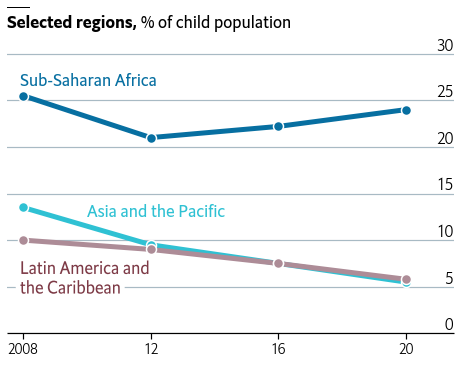

In [4]:
# Initialize plot ------------------------------------------
fig, ax = plt.subplots(figsize=(8, 6))

# Add lines with dots
# Note the zorder to have dots be on top of the lines
for percentage, color in zip(percentages, COLORS):
    ax.plot(year, percentage, color=color, lw=5)
    ax.scatter(year, percentage, fc=color, s=100, lw=1.5, ec="white", zorder=12)

    
# Customize axis -------------------------------------------

# Customize y-axis ticks
ax.yaxis.set_ticks([i * 5 for i in range(0, 7)])
ax.yaxis.set_ticklabels([i * 5 for i in range(0, 7)])
ax.yaxis.set_tick_params(labelleft=False, length=0)

# Customize y-axis ticks
ax.xaxis.set_ticks([2008, 2012, 2016, 2020])
ax.xaxis.set_ticklabels([2008, 12, 16, 20], fontsize=16, fontfamily="Econ Sans Cnd", fontweight=100)
ax.xaxis.set_tick_params(length=6, width=1.2)

# Make gridlines be below most artists.
ax.set_axisbelow(True)

# Add grid lines
ax.grid(axis = "y", color="#A8BAC4", lw=1.2)

# Remove all spines but the one in the bottom
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)

# Customize bottom spine
ax.spines["bottom"].set_lw(1.2)
ax.spines["bottom"].set_capstyle("butt")

# Set custom limits
ax.set_ylim(0, 35)
ax.set_xlim(2007.5, 2021.5)

# Add labels for vertical grid lines -----------------------
# The pad is equal to 1% of the vertical range (35 - 0)
PAD = 35 * 0.01
for label in [i * 5 for i in range(0, 7)]:
    ax.text(
        2021.5, label + PAD, label, 
        ha="right", va="baseline", fontsize=18,
        fontfamily="Econ Sans Cnd", fontweight=100
    )

# Annotate labels for regions ------------------------------
# We create a function to avoid repeating 'ax.text' many times

path_effects = [withStroke(linewidth=10, foreground="white")]
def add_region_label(x, y, text, color, path_effects, ax):
    ax.text(
        x, y, text, color=color,
        fontfamily="Econ Sans Cnd", fontsize=18, 
        va="center", ha="left", path_effects=path_effects
    ) 

region_labels = [
    {
        "x": 2007.9, "y": 5.8, "text": "Latin America and\nthe Caribbean", 
        "color": BROWN_DARKER, "path_effects": path_effects},
    {
        "x": 2010, "y": 13, "text": "Asia and the Pacific", 
        "color": GREEN, "path_effects": []
    },
    {
        "x": 2007.9, "y": 27, "text": "Sub-Saharan Africa", 
        "color": BLUE, "path_effects": []
    },
]    

for label in region_labels:
    add_region_label(**label, ax=ax)
    

# Add title ------------------------------------------------
# We manually set the location of both texts.
# This is because we can't mix bold and normal text with this custom font
ax.text(0, 0.975, "Selected regions,", 
        fontsize=18, fontfamily="Econ Sans Cnd", va="top",
        transform=ax.transAxes, fontweight="bold" 
)
ax.text(0.3, 0.975, "% of child population", 
        fontsize=18, fontfamily="Econ Sans Cnd", va="top",
        transform=ax.transAxes
)

# This is the small line on top of the title
# Note the 'solid_capstyle' and the 'transform', these are very important
ax.add_artist(
    lines.Line2D(
        [0, 0.05], [1, 1], lw=2, color="black",
        solid_capstyle="butt", transform=ax.transAxes
    )
)

fig.set_facecolor("white")
fig.savefig("plot.png", dpi=300)

In [5]:
COLORS += [GREY]
counts = [
    [65, 55, 67, 85],
    [130, 85, 65, 50],
    [10, 10, 10, 8],
    [60, 20, 10, 16]
    
]

The "butt" capstyle forces the line not to extend from the limits


see: https://matplotlib.org/stable/api/_enums_api.html?highlight=capstyle#matplotlib._enums.CapStyle

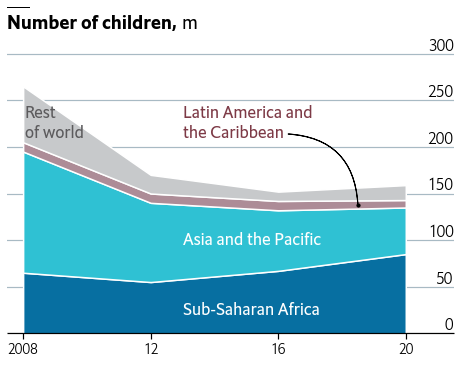

In [6]:
# Initialize plot ------------------------------------------
fig, ax = plt.subplots(figsize=(8, 6))

# Add stacked area
ax.stackplot(year, counts, colors=COLORS, lw=1.5, edgecolor='white');

# Customize axis -------------------------------------------

# Customize y-axis ticks
ax.yaxis.set_ticks([i * 50 for i in range(0, 7)])
ax.yaxis.set_ticklabels([i * 50 for i in range(0, 7)])
ax.yaxis.set_tick_params(labelleft=False, length=0)

# Customize x-axis ticks
ax.xaxis.set_ticks([2008, 2012, 2016, 2020])
ax.xaxis.set_ticklabels([2008, 12, 16, 20], fontsize=16, fontfamily="Econ Sans Cnd", fontweight=100)
ax.xaxis.set_tick_params(length=6, width=1.2)

# Make gridlines be below most artists.
ax.set_axisbelow(True)

# Add grid lines
ax.grid(axis = "y", color="#A8BAC4", lw=1.2)

# Remove all spines but the one in the bottom
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)

# Customize bottom spine
ax.spines["bottom"].set_lw(1.2)
ax.spines["bottom"].set_capstyle("butt")

# Specify both horizontal and vertical limits
ax.set_ylim(0, 350)
ax.set_xlim(2007.5, 2021.5)


# Add labels for vertical grid lines -----------------------
# The pad is equal to 1% of the vertical range (350 - 0)
PAD = 350 * 0.01
for label in [i * 50 for i in range(0, 7)]:
    ax.text(
        2021.5, label + PAD, label, 
        ha="right", va="baseline", fontsize=18,
        fontfamily="Econ Sans Cnd", fontweight=100
    )
    

# Annotate labels for regions ------------------------------
# We create a function to avoid repeating 'ax.text' many times
def add_region_label(x, y, text, color, ax):
    ax.text(
        x, y, text, color=color,
        fontfamily="Econ Sans Cnd", fontsize=18, 
        va="center", ha="left"
    ) 

region_labels = [
    {"x": 2013, "y": 225, "text": "Latin America and\nthe Caribbean", "color": BROWN_DARKER},
    {"x": 2013, "y": 100, "text": "Asia and the Pacific", "color": "white"},
    {"x": 2013, "y": 25, "text": "Sub-Saharan Africa", "color": "white"},
    {"x": 2008.05, "y": 225, "text": "Rest\nof world", "color": GREY_DARKER},
]    

for label in region_labels:
    add_region_label(**label, ax=ax)


# Add title ------------------------------------------------
# Note, again, we manually set the location of both texts.
ax.text(0, 0.975, "Number of children,", 
        fontsize=20, fontfamily="Econ Sans Cnd", va="top",
        transform=ax.transAxes, fontweight="bold" 
)
ax.text(0.39, 0.975, "m", 
        fontsize=20, fontfamily="Econ Sans Cnd", va="top",
        transform=ax.transAxes
)

# Same line on top of title
ax.add_artist(
    lines.Line2D(
        [0, 0.05], [1, 1], lw=2, color="black",
        solid_capstyle="butt", transform=ax.transAxes
    )
)

# Add custom arrow-like line -------------------------------
# It's not possible to use a dot as an arrowhead.
# So we add an arrow without a head, but we then add a point
# using `ax.scatter()` as shown below
ax.add_artist(
    patches.FancyArrowPatch(
        (2016.25, 214), (2018.5, 137),
        arrowstyle = "Simple", 
        connectionstyle="arc3, rad=-0.45",
        color="k"
    )
)

ax.scatter(2018.5, 138, s=10, color="k")

fig.set_facecolor("white")
fig.savefig("plot2.png", dpi=300)

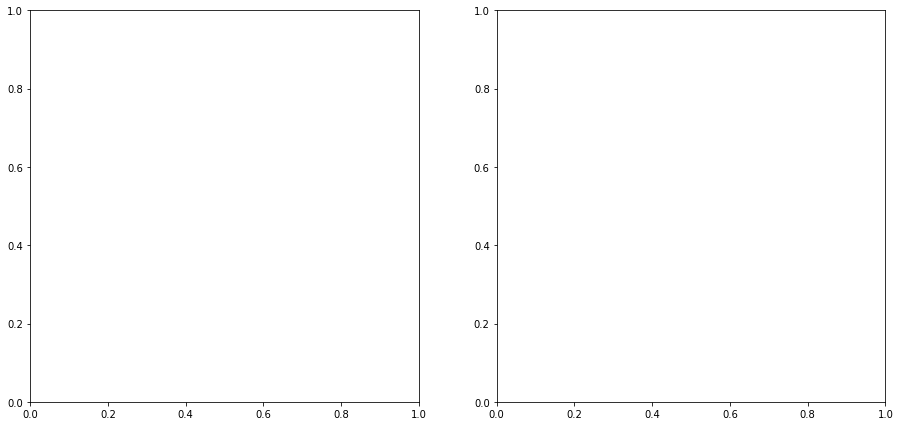

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7.2))
fig.subplots_adjust(left=0.005, right=0.995)

fig.set_facecolor("w")
fig.savefig("plot.png", dpi=300)

In [8]:
def customize_axis(ax):
   # Make gridlines be below most artists.
    ax.set_axisbelow(True)

    # Add grid lines
    ax.grid(axis = "y", color="#A8BAC4", lw=1.2)

    # Customize x-axis ticks
    ax.xaxis.set_ticks([2008, 2012, 2016, 2020])
    ax.xaxis.set_ticklabels([2008, 12, 16, 20], fontsize=16, fontfamily="Econ Sans Cnd", fontweight=100)
    ax.xaxis.set_tick_params(length=6, width=1.2)
    
    # Remove all spines but the one in the bottom
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Customize bottom spine
    ax.spines["bottom"].set_lw(1.2)
    ax.spines["bottom"].set_capstyle("butt") 


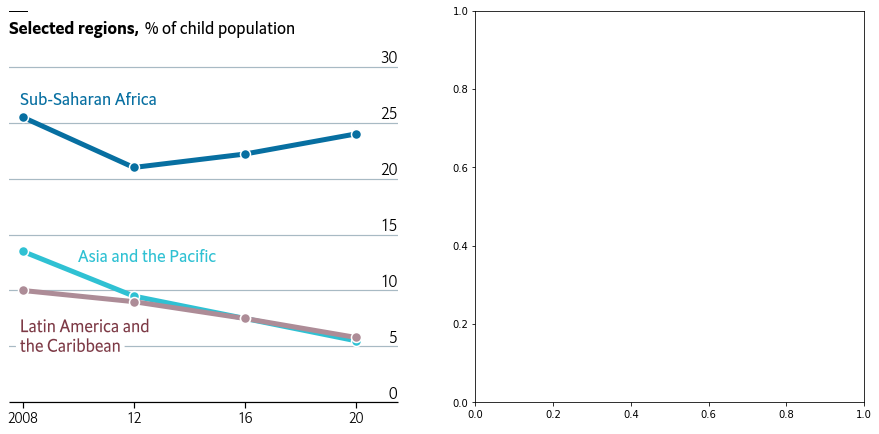

In [9]:
# Add lines with dots
for percentage, color in zip(percentages, COLORS):
    axes[0].plot(year, percentage, color=color, lw=5)
    axes[0].scatter(year, percentage, fc=color, s=100, lw=1.5, ec="white", zorder=12)

# Customize axis -------------------------------------------
# Customize y-axis ticks
axes[0].yaxis.set_ticks([i * 5 for i in range(0, 7)])
axes[0].yaxis.set_ticklabels([i * 5 for i in range(0, 7)])
axes[0].yaxis.set_tick_params(labelleft=False, length=0)

customize_axis(axes[0])

# Set custom limits
axes[0].set_ylim(0, 35)
axes[0].set_xlim(2007.5, 2021.5)

# Add labels for vertical grid lines -----------------------
PAD = 35 * 0.01
for label in [i * 5 for i in range(0, 7)]:
    axes[0].text(
        2021.5, label + PAD, label, 
        ha="right", va="baseline", fontsize=18,
        fontfamily="Econ Sans Cnd", fontweight=100
    )

# Annotate labels for regions ------------------------------
path_effects = [withStroke(linewidth=10, foreground="white")]
def add_region_label(x, y, text, color, path_effects, ax):
    ax.text(
        x, y, text, color=color,
        fontfamily="Econ Sans Cnd", fontsize=18, 
        va="center", ha="left", path_effects=path_effects
    ) 

region_labels = [
    {
        "x": 2007.9, "y": 5.8, "text": "Latin America and\nthe Caribbean", 
        "color": BROWN_DARKER, "path_effects": path_effects},
    {
        "x": 2010, "y": 13, "text": "Asia and the Pacific", 
        "color": GREEN, "path_effects": []
    },
    {
        "x": 2007.9, "y": 27, "text": "Sub-Saharan Africa", 
        "color": BLUE, "path_effects": []
    },
]    

for label in region_labels:
    add_region_label(**label, ax=axes[0])

# Add title ------------------------------------------------
axes[0].text(0, 0.975, "Selected regions,", 
        fontsize=18, fontfamily="Econ Sans Cnd", va="top",
        transform=axes[0].transAxes, fontweight="bold" 
)
axes[0].text(0.35, 0.975, "% of child population", 
        fontsize=18, fontfamily="Econ Sans Cnd", va="top",
        transform=axes[0].transAxes
)
axes[0].add_artist(
    lines.Line2D(
        [0, 0.05], [1, 1], lw=2, color="black",
        solid_capstyle="butt", transform=axes[0].transAxes
    )
)
fig

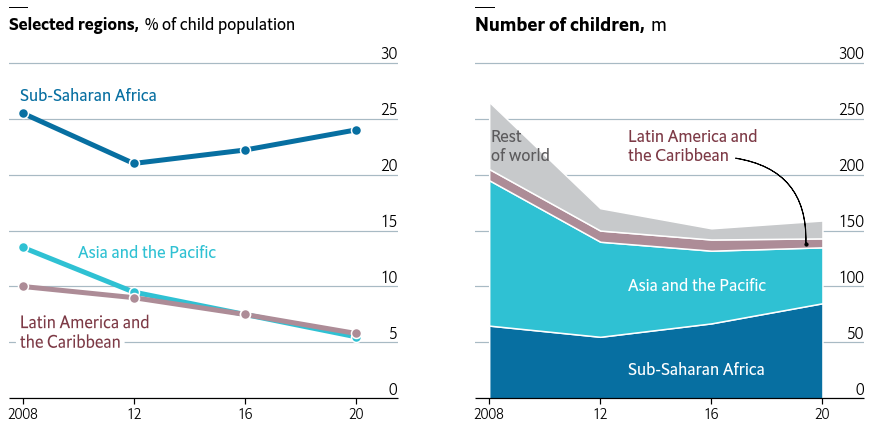

In [10]:
# Add stacked area
axes[1].stackplot(year, counts, colors=COLORS, lw=1.5, edgecolor='white');

# Customize axis -------------------------------------------

# Customize y-axis ticks
axes[1].yaxis.set_ticks([i * 50 for i in range(0, 7)])
axes[1].yaxis.set_ticklabels([i * 50 for i in range(0, 7)])
axes[1].yaxis.set_tick_params(labelleft=False, length=0)

customize_axis(axes[1])

# Specify both horizontal and vertical limits
axes[1].set_ylim(0, 350)
axes[1].set_xlim(2007.5, 2021.5)


# Add labels for vertical grid lines -----------------------
# The pad is equal to 1% of the vertical range (350 - 0)
PAD = 350 * 0.01
for label in [i * 50 for i in range(0, 7)]:
    axes[1].text(
        2021.5, label + PAD, label, 
        ha="right", va="baseline", fontsize=18,
        fontfamily="Econ Sans Cnd", fontweight=100
    )
    

# Annotate labels for regions ------------------------------
# We create a function to avoid repeating 'ax.text' many times
def add_region_label(x, y, text, color, ax):
    axes[1].text(
        x, y, text, color=color,
        fontfamily="Econ Sans Cnd", fontsize=18, 
        va="center", ha="left"
    ) 

region_labels = [
    {"x": 2013, "y": 225, "text": "Latin America and\nthe Caribbean", "color": BROWN_DARKER},
    {"x": 2013, "y": 100, "text": "Asia and the Pacific", "color": "white"},
    {"x": 2013, "y": 25, "text": "Sub-Saharan Africa", "color": "white"},
    {"x": 2008.05, "y": 225, "text": "Rest\nof world", "color": GREY_DARKER},
]    

for label in region_labels:
    add_region_label(**label, ax=axes[1])


# Add title ------------------------------------------------
# Note, again, we manually set the location of both texts.
axes[1].text(0, 0.975, "Number of children,", 
        fontsize=20, fontfamily="Econ Sans Cnd", va="top",
        transform=axes[1].transAxes, fontweight="bold" 
)
axes[1].text(0.45, 0.975, "m", 
        fontsize=20, fontfamily="Econ Sans Cnd", va="top",
        transform=axes[1].transAxes
)

# Same line on top of title
axes[1].add_artist(
    lines.Line2D(
        [0, 0.05], [1, 1], lw=2, color="black",
        solid_capstyle="butt", transform=axes[1].transAxes
    )
)

# Add custom arrow-like line -------------------------------
# It's not possible to use a dot as an arrowhead.
# So we add an arrow without a head, but we then add a point
# using `ax.scatter()` as shown below
axes[1].add_artist(
    patches.FancyArrowPatch(
        (2016.8, 215), (2019.4, 137),
        arrowstyle = "Simple", 
        connectionstyle="arc3, rad=-0.45",
        color="k"
    )
)

axes[1].scatter(2019.4, 138, s=10, color="k")
fig